In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv('emissions_by_country.csv')

In [177]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
df.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2997.000000


In [250]:
df.shape

(63104, 12)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               61087 non-null  object 
 1   ISO 3166-1 alpha-3    59483 non-null  object 
 2   Year                  62307 non-null  float64
 3   Total                 62381 non-null  float64
 4   Temperature           63104 non-null  int64  
 5   GDP Per Capita (USD)  63104 non-null  int64  
 6   Coal                  21797 non-null  float64
 7   Oil                   21774 non-null  float64
 8   Gas                   21717 non-null  float64
 9   Cement                20488 non-null  float64
 10  Flaring               21338 non-null  float64
 11  Other                 2685 non-null   float64
 12  Per Capita            19392 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ MB


In [180]:
df.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [181]:
df.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [182]:
df.shape

(63104, 13)

Here we can observe that Other column is most likely null and can be ignored. But other columns hold relevant information and can not be eliminated nor can be imputed, since it would not be in line with real world scenario. 

In [183]:
df = df.drop('Other', axis=1)

In [184]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Temperature',
       'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [185]:
# with this we eliminate country and iso reference null values 
df_1 = df.loc[df['Country'].notnull() & df['ISO 3166-1 alpha-3'].notnull()]

In [186]:
df_1.isnull().sum()

Country                     0
ISO 3166-1 alpha-3          0
Year                      318
Total                     399
Temperature                 0
GDP Per Capita (USD)        0
Coal                    37667
Oil                     37710
Gas                     37803
Cement                  38729
Flaring                 37969
Per Capita              40467
dtype: int64

In [187]:
df_1 = df_1.fillna(0)

In [188]:
df_1.isnull().sum()

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Per Capita              0
dtype: int64

In [189]:
df_1.to_csv('df-cleaning-itr-1.csv', index=False)

In [190]:
clean_df = df_1

In [192]:
clean_df.shape

(58210, 12)

In [193]:
clean_df = clean_df.rename({'ISO 3166-1 alpha-3': 'ISO'}, axis='columns')

In [194]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
clean_df['Country']=clean_df['Country'].str.upper()


In [196]:
clean_df['ISO'] = clean_df['ISO'].str.upper()

In [197]:
clean_df.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0


EDA Graphical exploration 

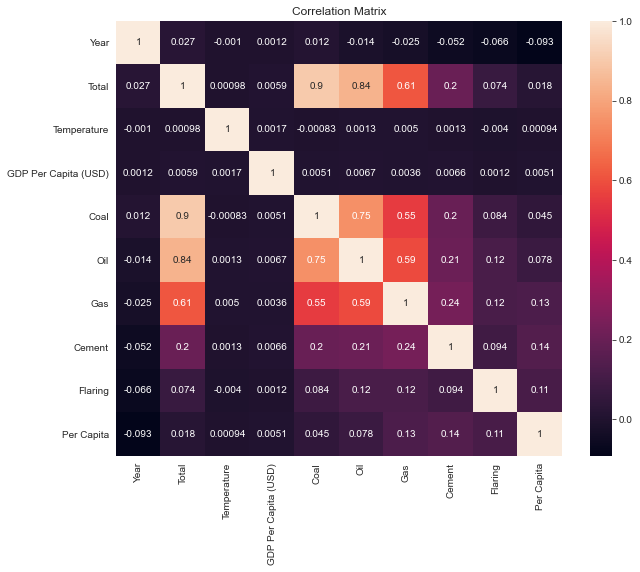

In [198]:
numeric_df = clean_df.select_dtypes(include=['float64','int64'])
matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

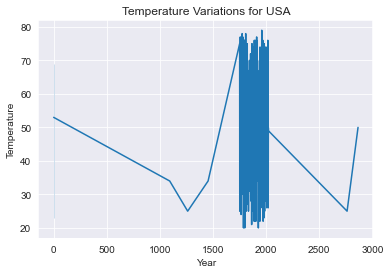

In [199]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

This particular analysis shows further gap in the data. There exists data pointing to future as well. We will delete all these entries and put it to clean_df

In [200]:
clean_df = clean_df.loc[clean_df['Year'] < 2024]

This operation should eliminate undesired future dates.

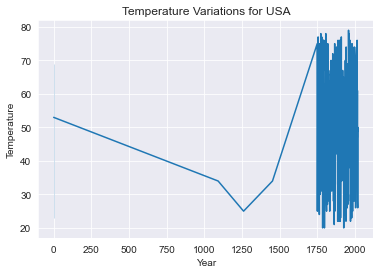

In [201]:
country='USA'
temp_to_year_df = clean_df[['Country','Year','Temperature']]
country_data = temp_to_year_df[temp_to_year_df['Country'] == country]
sns.lineplot(x='Year', y='Temperature', data=country_data)
plt.title(f"Temperature Variations for {country}")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

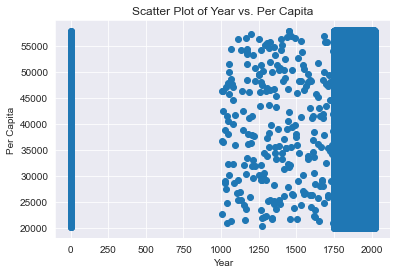

In [202]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

In [203]:
clean_df.loc[clean_df['Year'] == 0]

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
106,AFGHANISTAN,AFG,0.0,0.000000,48,51887,0.00000,0.000000,1398.0,0.000000,0.0,0.000000
480,ALBANIA,ALB,0.0,1.201465,30,35918,0.00000,0.000000,0.0,0.039977,0.0,0.750455
705,ALGERIA,DZA,0.0,0.000000,28,41983,0.00000,0.000000,0.0,0.000000,0.0,1444.000000
1013,ANDORRA,AND,0.0,0.000000,20,48225,0.00000,0.000000,0.0,0.000000,0.0,0.000000
1018,ANDORRA,AND,0.0,1399.000000,27,53381,0.00000,0.000000,0.0,0.000000,0.0,1634.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
61675,WALLIS AND FUTUNA ISLANDS,WLF,0.0,0.000000,29,37549,0.00000,1027.000000,0.0,0.000000,0.0,0.000000
61886,YEMEN,YEM,0.0,0.000000,71,55414,0.00000,0.000000,0.0,0.000000,0.0,0.000000
62138,ZAMBIA,ZMB,0.0,0.000000,46,45792,0.00000,0.000000,0.0,0.000000,0.0,0.000000
62447,ZIMBABWE,ZWE,0.0,0.000000,67,56334,1393.00000,0.000000,0.0,0.000000,0.0,0.000000


We can observe that GDP per capita is plotted for only year 0. This can be considered an outlier and since its an extreme one, it can influence the outcome of our operation further down the line. We will eliminate these records. 

In [204]:
clean_df = clean_df.loc[clean_df['Year'] != 0]


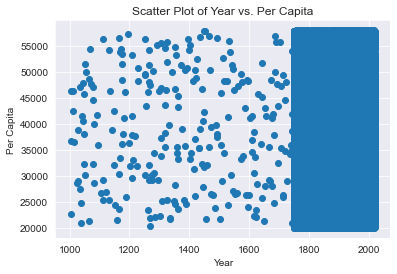

In [205]:
plt.scatter(clean_df['Year'], clean_df['GDP Per Capita (USD)'])
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Scatter Plot of Year vs. Per Capita')
plt.grid(True)
plt.show()

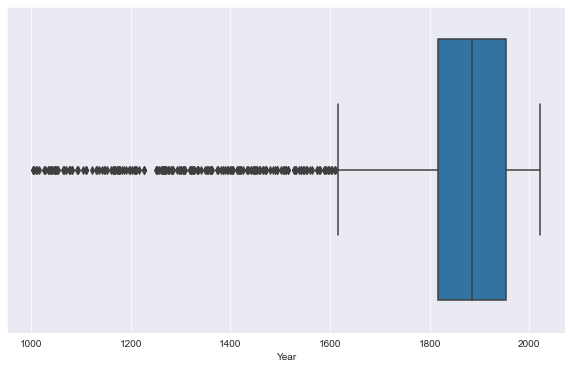

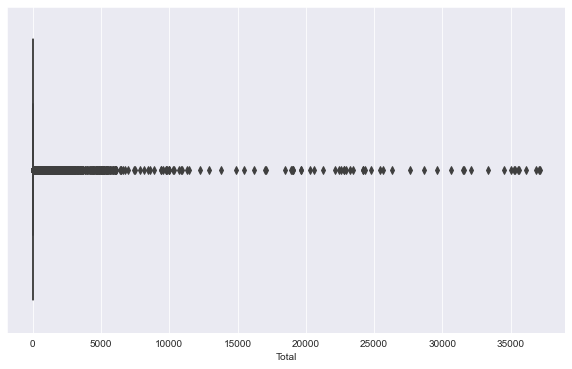

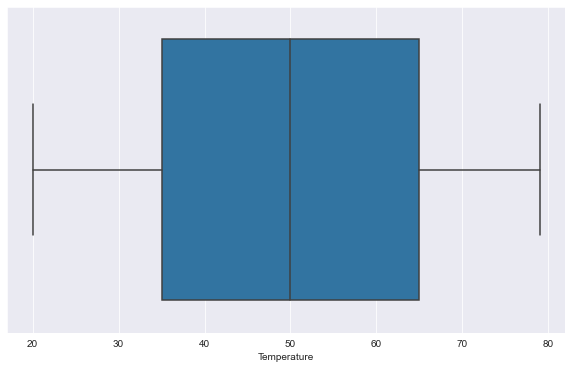

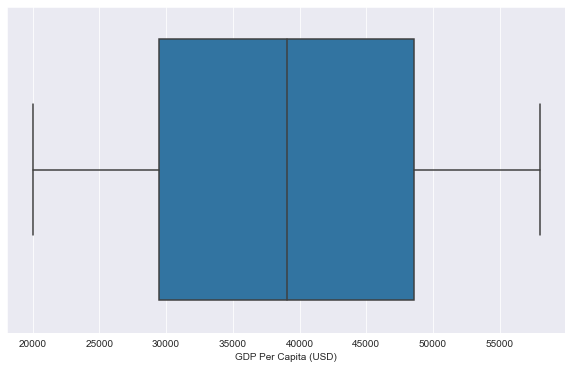

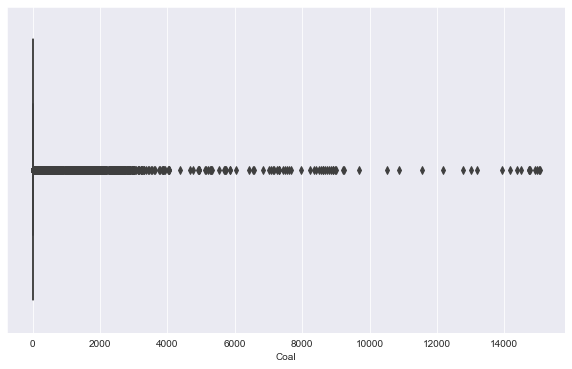

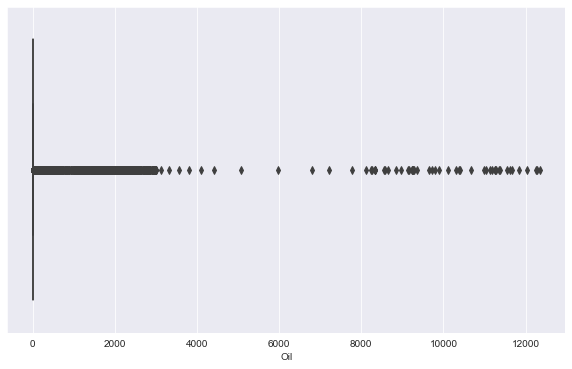

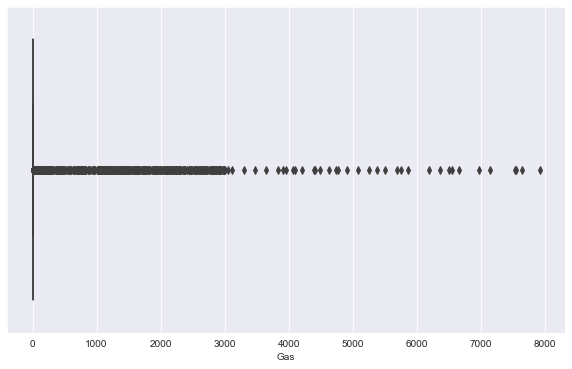

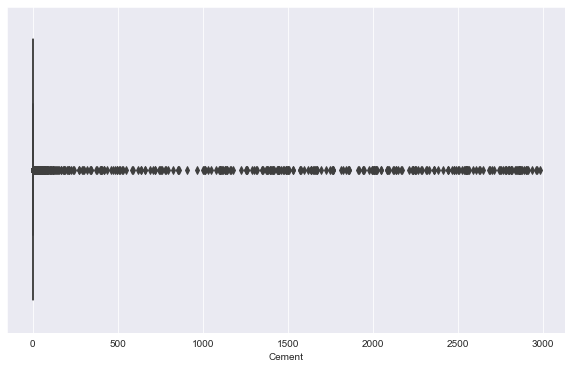

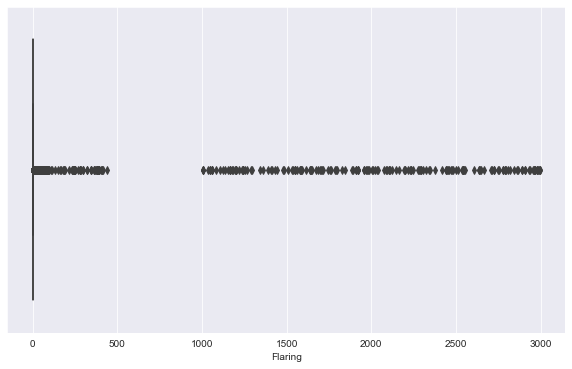

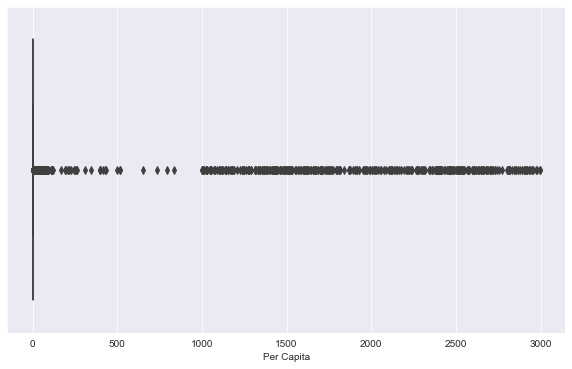

In [206]:
for c in clean_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=clean_df[c])
    plt.show()

In [222]:
df_zscore = clean_df.copy()
for i in df.select_dtypes(include=['int64','float64']).columns:
  z_score_column = i + '_z-score'
  df_zscore[z_score_column] = (df[i] - df[i].mean()) / df[i].std()

In [223]:
df_zscore.head()


,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df_zscore.shape

(57570, 22)

In [225]:
capture_outlier_column = []
for i in df_zscore.columns[df_zscore.columns.str.endswith('_z-score')]:
    outliers = df_zscore[df_zscore[i] > 3 ]
    print(f"Number of outliers in {i}: {len(outliers)}")
    if len(outliers) > 0:
        capture_outlier_column.append(i)

Number of outliers in Year_z-score: 0
Number of outliers in Total_z-score: 235
Number of outliers in Temperature_z-score: 0
Number of outliers in GDP Per Capita (USD)_z-score: 0
Number of outliers in Coal_z-score: 215
Number of outliers in Oil_z-score: 227
Number of outliers in Gas_z-score: 256
Number of outliers in Cement_z-score: 186
Number of outliers in Flaring_z-score: 167
Number of outliers in Per Capita_z-score: 246


In [226]:
capture_outlier_column

['Total_z-score',
 'Coal_z-score',
 'Oil_z-score',
 'Gas_z-score',
 'Cement_z-score',
 'Flaring_z-score',
 'Per Capita_z-score']

In [227]:
for i in capture_outlier_column:
    df_zscore = df_zscore.drop(df_zscore.loc[df_zscore[i] > 3].index)

In [228]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,...,Year_z-score,Total_z-score,Temperature_z-score,GDP Per Capita (USD)_z-score,Coal_z-score,Oil_z-score,Gas_z-score,Cement_z-score,Flaring_z-score,Per Capita_z-score
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,...,-1.127320,-0.08731,1.185639,1.496825,NaN,NaN,NaN,NaN,NaN,NaN
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,...,-1.119167,-0.08731,0.954320,0.553454,NaN,NaN,NaN,NaN,NaN,NaN
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,...,-1.111013,-0.08731,1.301299,-0.650131,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,...,-1.102860,-0.08731,-0.317938,-0.324407,NaN,NaN,NaN,NaN,NaN,NaN
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,...,-1.094707,-0.08731,-1.648026,-0.526584,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
df_zscore = df_zscore.drop(columns=[col for col in df_zscore.columns if col.endswith('_z-score')])


In [231]:
df_zscore.head()

,Country,ISO,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,AFGHANISTAN,AFG,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0
1,AFGHANISTAN,AFG,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0
2,AFGHANISTAN,AFG,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0
3,AFGHANISTAN,AFG,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0
4,AFGHANISTAN,AFG,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
df_zscore.shape

(56547, 12)

### We can observe that the entries have changed and we have eliminated outliers which are more than 3 standard deviations away. New df row count = 56547 , previous count = 57570

In [233]:
clean_df = df_zscore.copy()

In [234]:
sublist = ['Coal','Oil','Gas','Cement','Flaring']

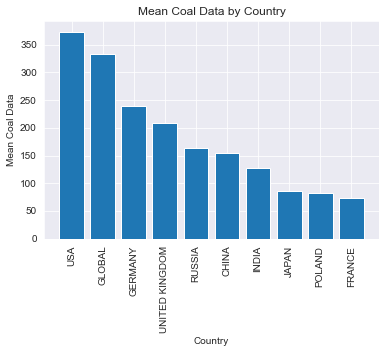

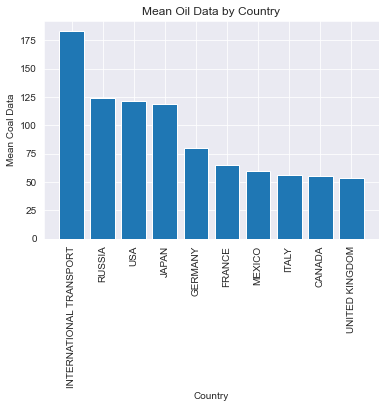

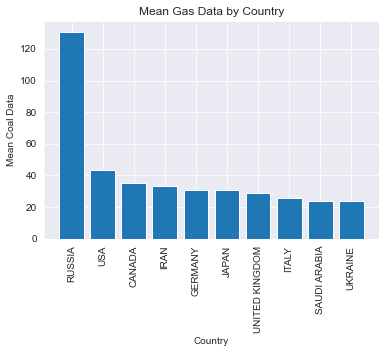

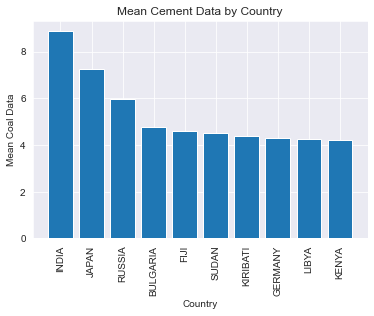

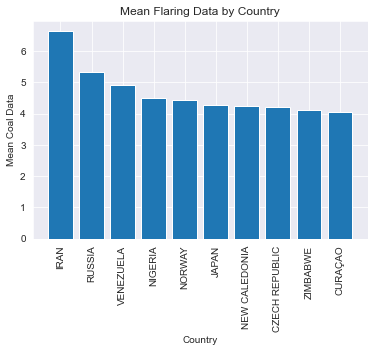

In [235]:
for col in sublist:
    mean_coal_data = clean_df.groupby('Country')[col].mean()
    top10Largest = mean_coal_data.nlargest(10)
    plt.bar(top10Largest.index, top10Largest.values)
    plt.xlabel('Country')
    plt.ylabel('Mean Coal Data')
    plt.title(f'Mean {col} Data by Country')
    plt.xticks(rotation=90)
    plt.show()  

In [236]:
df_1.to_csv('df-cleaning-itr-2.csv', index=False)

In [237]:
df_encoded = pd.get_dummies(clean_df, columns=['Country', 'ISO'])

In [240]:
df_encoded.to_csv('df-string-encoded.csv', index=False)

In [239]:
df_encoded.head()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,1750.0,0.0,70,55455,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1751.0,0.0,66,45101,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1752.0,0.0,72,31891,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1753.0,0.0,44,35466,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1754.0,0.0,21,33247,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
clean_df.columns[5:]

Index(['GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [242]:
non_categorical_cols = clean_df.columns[5:]

In [243]:
min_values = df_encoded[non_categorical_cols].min()
max_values = df_encoded[non_categorical_cols].max()

In [244]:
normalized_df = (df_encoded[non_categorical_cols] - min_values) / (max_values - min_values)


In [245]:
normalized_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita
0,0.933051,0.0,0.0,0.0,0.0,0.0,0.0
1,0.660570,0.0,0.0,0.0,0.0,0.0,0.0
2,0.312929,0.0,0.0,0.0,0.0,0.0,0.0
3,0.407011,0.0,0.0,0.0,0.0,0.0,0.0
4,0.348614,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
pre_processed_df = pd.concat([normalized_df,df_encoded.iloc[:,5:]], axis=1)

In [247]:
pre_processed_df.head()

,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Per Capita,Oil,Gas,Cement,...,ISO_VNM,ISO_VUT,ISO_WLD,ISO_WLF,ISO_WSM,ISO_XIT,ISO_YEM,ISO_ZAF,ISO_ZMB,ISO_ZWE
0,0.933051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.660570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.312929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.407011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.348614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
pre_processed_df.to_csv('pre_processed_df.csv', index=False)